# Project Report on Mini-Project2: RandomVariateGenerator (RandVarGen)
# Users Guide
by: Yogesh Raheja (yraheja3@gatech.edu)

**Objective:** Make a 'nice' library of Random Variate Generation routines in Python from a given U(0,1) number. Random Variate Generator (RandVarGen) exposes a number of methods for generating random numbers drawn from a variety of probability distributions.

RandVarGen has the following properties:
1. Output appears to be i.i.d. Unif(0,1). The probability distributions are derived using NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState").
2. It is fast. The code uses highly-optimized math formula's to minimize resource intensive functions like log(), etc. However, the speed is slower than NumPy's RandomState and [BitGenerator](https://numpy.org/doc/stable/reference/random/generator.html "BitGenerator") by about 10-25%.
3. It has the ability to reproduce any sequence it generates. RandVarGen uses a seed and RandomStates [Mersenne Twister pseudo-random number generator (PRNG)](https://en.wikipedia.org/wiki/Mersenne_Twister "Mersenne Twister") to generate a 'sequence' of required probability distribution.

In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned.

<font
color=green>
### The Code</font>

In [3]:
# Make me a nice library of random variate generation routines.
# You can use your favorite high-level language like C++, Java, Python,
# Matlab, or even Excel. Include in your library routines for generating
# random variates from all of the usual discrete and continuous distributions,
# e.g., Bern(p), Geom(p), Exp(λ), Normal(μ,σ2), Gamma(α,β), Weibull(α,β), etc., etc.
# (Just one routine per distribution is fine.)
# Include in your write-up an easy user’s guide, complete source code,
# and some appropriate examples.

import numpy as np
import math
import operator
import random
from scipy.stats import norm
from decimal import Decimal
import matplotlib.pyplot as plt


# Initialising and Defining the class rvg
class RandVarGen:
    def __init__(self, random_no=0):
        self.seed = random_no

# Validating the random number and raising an exception if error
    seed = property(operator.attrgetter('_seed'))

    @seed.setter
    def seed(self, seed):
        # if not ((seed >= 0) and (seed <= 1)):
        if isinstance(seed, (str, list, dict, tuple)):
            raise Exception("Please enter a valid integer as seed")
        if isinstance(seed, float):
            seed = int(seed)
            print("Converted seed to integer")
        if seed == 0:
            print("Considering default seed of 0")
        self._seed = int(seed)

# To generate a single X of a Bernoulli(p) distribution
    def bern(self, p, u):
        if u <= p:
            return 1
        else:
            return 0

# To generate a np.array of X of a Bernoulli(p) distribution
    def bernoulli(self, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.bern(p, unif_no))
        else:
            unif_no = random.random()
            return self.bern(p, unif_no)
        return np.array(out_array)

# To generate X of a Geometric(p) distribution
    def geom(self, p, unif_no):
        return math.ceil(np.log(1-unif_no) / np.log(1-p))

# To generate a np.array of X of a Geometric(p) distribution
    def geometric(self, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.geom(p, unif_no))
        else:
            unif_no = random.random()
            return self.geom(p, unif_no)
        return np.array(out_array)

# To generate X of a Poisson(lambda) distribution
    def pois(self, a_lambda, unif_no):
        lower_bound = 0
        x = 0
        while x > -1:
            fx = Decimal((Decimal(math.e ** -a_lambda) * (2 ** x)) / Decimal(math.factorial(x)))
            Fx = lower_bound + fx
            if lower_bound <= unif_no <= Fx:
                return x
            else:
                x += 1
                lower_bound = Fx

# To generate a np.array of X of a Poisson(lambda) distribution
    def poisson(self, a_lambda, size=None):
        random.seed(self.seed)
        if a_lambda > 2:
            return "Can't process lambda values greater than 2. Please wait for the next version of the library"
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.pois(a_lambda, unif_no))
        else:
            unif_no = random.random()
            return self.pois(a_lambda, unif_no)
        return np.array(out_array)

# To generate X of a Triangular(0,1,2) distribution
    def tria(self, unif_no):
        if unif_no < 0.5:
            return (2 * unif_no) ** 0.5
        else:
            return 2 - (2 * (1-unif_no)) ** 0.5

# To generate a np.array of X of a Triangular(0, 1, 2) distribution
    def triangular(self, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.tria(unif_no))
        else:
            unif_no = random.random()
            return self.tria(unif_no)
        return np.array(out_array)

# To generate X of a Normal(mu, var) distribution
    def norm(self, mu, var, unif_no):
        return norm.ppf(unif_no, loc=mu, scale=var**0.5)

# To generate a np.array of X of a Normal(mu, var) distribution
    def normal(self, mu=0, var=1, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.norm(mu, var, unif_no))
        else:
            unif_no = random.random()
            return self.norm(mu, var, unif_no)
        return np.array(out_array)

# To generate X of a Weibull(lambda, beta) distribution
    def weib(self, a_lambda, beta, unif_no):
        return (1/a_lambda) * (-np.log(1-unif_no))**(1/beta)

# To generate a np.array of X of a Weibull(lambda, beta) distribution
    def weibull(self, a_lambda, beta, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.weib(a_lambda=a_lambda, beta=beta, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.weib(a_lambda=a_lambda, beta=beta, unif_no=unif_no)
        return np.array(out_array)

# To generate X of an Exponential(lambda) distribution
    def exp(self, a_lambda, unif_no):
        return (-1/a_lambda) * np.log(1-unif_no)

# To generate a np.array of X of an Exponential(lambda) distribution
    def exponential(self, a_lambda, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.exp(a_lambda=a_lambda, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.exp(a_lambda=a_lambda, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Discrete pmf given any x and f(x) values distribution
    def disc(self, x, fx, unif_no):
        lower_bound = 0
        for i in range(len(x)):
            upper_bound = fx[i] + lower_bound
            if lower_bound <= unif_no <= upper_bound:
                return x[i]
            else:
                lower_bound = upper_bound

# To generate a np.array of X of a Discrete pmf given any x and f(x) distribution
    def discrete(self, x, fx, size=None):
        random.seed(self.seed)

        # To check if the input list lengths match
        if len(x) != len(fx):
            return "Input Error: list of x and f(x) have different lenghts"

        # To check if the pmf sums to 1
        if (1-sum(fx)) > 0.000000001:
            return "Input Error: pmf does not add to 1"

        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.disc(x, fx, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.disc(x, fx, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Uniform(a,b) distribution
    def unif(self, a, b, unif_no):
        return a + (b-a) * unif_no

# To generate a np.array of X of a Uniform(a,b) distribution
    def uniform(self, a, b, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.unif(a=a, b=b, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.unif(a=a, b=b, unif_no=unif_no)
        return np.array(out_array)

# To generate X of a Discrete Uniform(n) distribution with probability 1/n
    def disc_unif(self, n, unif_no):
        return math.ceil(unif_no * n)

# To generate a np.array of X of a Discrete Uniform(n) distribution with probability 1/n
    def discrete_uniform(self, n, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                unif_no = random.random()
                out_array.append(self.disc_unif(n=n, unif_no=unif_no))
        else:
            unif_no = random.random()
            return self.disc_unif(n=n, unif_no=unif_no)
        return np.array(out_array)

# To generate a single X of a Binomial(n,p) distribution
    def bin(self, n, p):
        n = math.floor(n)
        return np.sum(np.array(self.bernoulli(p=p, size=n)))

# To generate a np.array of X of a Binomial(n,p) distribution
    def binomial(self, n, p, size=None):
        random.seed(self.seed)
        if size:
            # random.seed(random.random())
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.bin(n=n, p=p))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.bin(n=n, p=p)
        return np.array(out_array)

# To generate a single of X of a Erlang(lambda, n) distribution
    def erl(self, a_lambda, n=1):
        random.seed(self.seed)
        unif_no_product = 1
        for i in range(n):
            unif_no_product *= random.random()
        return (-1/a_lambda) * np.log(unif_no_product)

# To generate a np.array of X of a Erlang(lambda, n) distribution
    def erlang(self, a_lambda, n, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.erl(a_lambda=a_lambda, n=n))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.erl(a_lambda=a_lambda, n=n)
        return np.array(out_array)

# To generate a single of X of a NegBin(n, p) distribution
    def NegBin_single(self, n, p):
        return np.sum(np.array(self.geometric(p=p, size=n)))

# To generate a np.array of X of a NegBin(n, p) distribution
    def negative_binomial(self, n, p, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.NegBin_single(p=p, n=n))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.NegBin_single(p=p, n=n)
        return np.array(out_array)

# To generate a single of X of a Normal(n, p) distribution
    def chisquare_single(self, n):
        out_value = 0
        for i in range(n):
            out_value += self.normal(mu=0, var=1)**2
        return out_value

# To generate a np.array of X of a Normal(n, p) distribution
    def chisquare(self, n, size=None):
        random.seed(self.seed)
        if size:
            size = int(size)
            out_array = []
            for i in range(size):
                self.seed = int(random.random() * 10 ** 20)
                out_array.append(self.chisquare_single(n=n))
        else:
            self.seed = int(random.random() * 10 ** 20)
            return self.chisquare_single(n=n)
        return np.array(out_array)


# To plot a derived distribution
def plot_cont_dist(x, title):
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("probability")
    plt.hist(x, bins=100, color="blue")
    plt.show()

<font
color=green>
### RandVarGen().bernoulli()</font>



<font
color=green>
### RandVarGen().binomial()</font>

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n is an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

#### Usage
RandVarGen(_seed=0_).binomial(_n, p, size=None_)

#### Parameters:
$\quad$ $\quad$
seed: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be converted to integers.

$\quad$ $\quad$
n: _int_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.

$\quad$ $\quad$
p: _float_

$\quad$ $\quad$ $\quad$ $\quad$  Parameter of the distribution, >= 0 and <=1

$\quad$ $\quad$
size: _int_

$\quad$ $\quad$ $\quad$ $\quad$ If size is None (default), a single value is returned. If size is an integer, a numpy array with the _size_ specified is drawn.

#### Returns:
$\quad$ $\quad$
out: _ndarray or scalar_

$\quad$ $\quad$ $\quad$ $\quad$  Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.

#### Notes
The probability density for the binomial distribution is


$ P(k) = \binom{n}{k} p^n (1-p)^{n-k} $

where $n$ is the number of trials, $p$ is the probability of success, and $k$ is the number of successes.

When estimating the standard error of a proportion in a population by using a random sample, the normal distribution works well unless the product $p*n <=5$, where p = population proportion estimate, and n = number of samples, in which case the binomial distribution is used instead. For example, a sample of 15 people shows 4 who are left handed, and 11 who are right handed. Then $ p = \frac{4}{15} = 27\% $.
$0.27 * 15 = 4$, so the binomial distribution should be used in this case.

#### References
1. Wikipedia, "Binomial Distribution"
$\quad$ https://en.wikipedia.org/wiki/Binomial_distribution

2. SciPy.org, "numpy.random.binomial"
$\quad$ https://numpy.org/doc/1.16/reference/generated/numpy.random.binomial.html#numpy.random.binomial

#### Examples

In [21]:
# result of flipping a coin 10 times, tested 100 times.
seed = 12345 #any integer giving the seed for the sequence
n, p = 10, .5  # number of trials, probability of each trial
s = RandVarGen(seed).binomial(n, p, 100)
print(s)

[6 6 4 7 5 2 5 5 6 4 7 8 3 4 4 5 4 5 4 2 7 5 7 4 4 6 7 6 3 2 6 6 4 6 4 8 4
 5 6 3 3 6 5 2 6 4 5 5 5 8 5 6 4 6 7 5 5 4 2 8 3 6 5 5 7 5 6 5 6 1 3 5 3 6
 7 2 4 6 3 3 2 5 4 6 4 7 4 7 5 6 5 7 4 7 2 3 3 5 4 5]


A real world example.

In a casino game, a dealer deals 9 sets of cards, each with an estimated probability of success of 0.25. All nine sets of cards fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [35]:
sum(RandVarGen(12345).binomial(9, 0.25, 20000) == 0)/20000
# answer = 0.0771 or 7.71%

0.0771

#### Comparison
Comparison to NumPy's Legacy Random Generation - [RandomState](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState "RandomState")

Considering default seed of 0


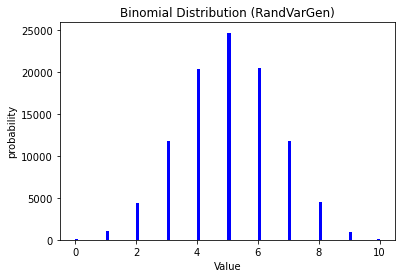

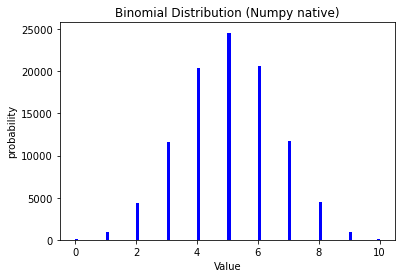

In [37]:
# Comparing Binomial distribution in RandVarGen with Python Native
binomial_RandVarGen = RandVarGen().binomial(10, 0.5,  size=100000)
binomial_native = np.random.binomial(10, 0.5, size=100000)
plot_cont_dist(binomial_RandVarGen, 'Binomial Distribution (RandVarGen)')
plot_cont_dist(binomial_native, 'Binomial Distribution (Numpy native)')
